<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Stephen_Sinclair_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency
from pandas.plotting import scatter_matrix

In [0]:
columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13',
           'A14','A15','A16']

In [0]:
# Load the data as a pandas dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, names=columns)

In [16]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [17]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [0]:
# Replace '?' with np.nan, change to class attribute to 0 or 1
df = df.replace({'?':np.nan, '-':0, '+':1})

In [23]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [19]:
# Validate that it has the appropriate number of observations:
# crx.names specifies 690 instances, and 16 attributes(15 + a class attribute)
# (690,16) would be the appropriate number of observations
df.shape

(690, 16)

In [20]:
df.describe()

,A3,A8,A11,A15,A16
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [21]:
df.describe(exclude='number')

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14
count,678,678,684,684,681,681,690,690,690,690,677
unique,2,349,3,3,14,9,2,2,2,3,170
top,b,22.67,u,g,c,v,t,f,f,g,00000
freq,468,9,519,519,137,399,361,395,374,625,132


In [22]:
# Check null values. They match those listed in crx.names:
#  Missing Attribute Values:
#     37 cases (5%) have one or more missing values.  The missing
#     values from particular attributes are:

#     A1:  12
#     A2:  12
#     A4:   6
#     A5:   6
#     A6:   9
#     A7:   9
#     A14: 13

df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [24]:
# Make sure that the loaded features are of the types described above 
# (continuous values should be treated as float), and correct as necessary

# Attribute Information:

#     A1:	b, a.
#     A2:	continuous.
#     A3:	continuous.
#     A4:	u, y, l, t.
#     A5:	g, p, gg.
#     A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
#     A7:	v, h, bb, j, n, z, dd, ff, o.
#     A8:	continuous.
#     A9:	t, f.
#     A10:	t, f.
#     A11:	continuous.
#     A12:	t, f.
#     A13:	g, p, s.
#     A14:	continuous.
#     A15:	continuous.
#     A16: +,-         (class attribute)

# A2 is object and should be float
# A2 has NaN values which are causing this

# A11 is int64 and should be float

# A14 is object and should be float
# A14 has NaN values that are causing this

# A15 is int64 and shoudl be float

df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

In [0]:
# Do the ints first
df['A11'] = df['A11'].astype('float64')
df['A15'] = df['A15'].astype('float64')

In [26]:
# A11 and A15 are type float64
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14     object
A15    float64
A16      int64
dtype: object

In [0]:
# Now the objects
df['A2'] = df['A2'].astype('float64')
df['A14'] = df['A14'].astype('float64')

In [28]:
# All the continuous variables are type float64
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16      int64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
accept = df[df['A16']==1]
reject = df[df['A16']==0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe32d4881d0>,
      dtype=object)

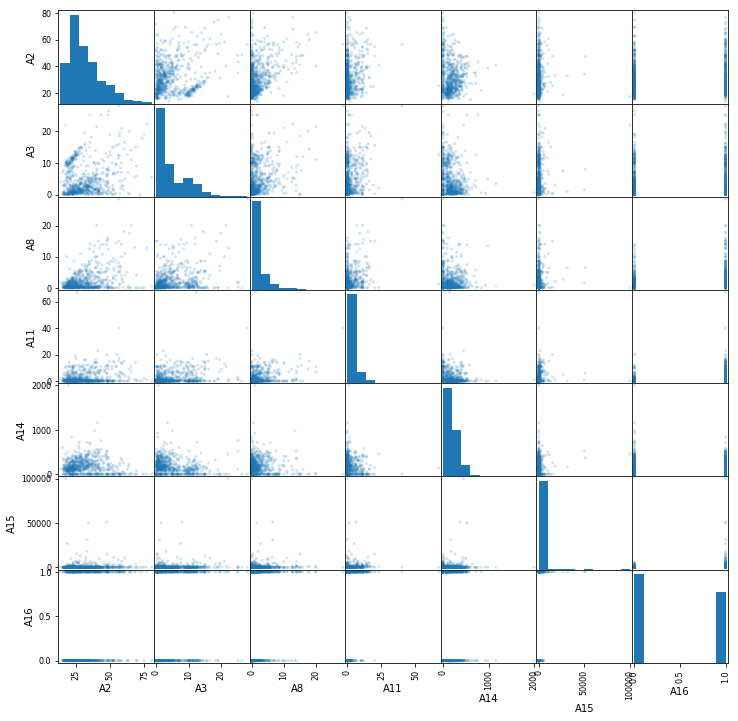

In [79]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))

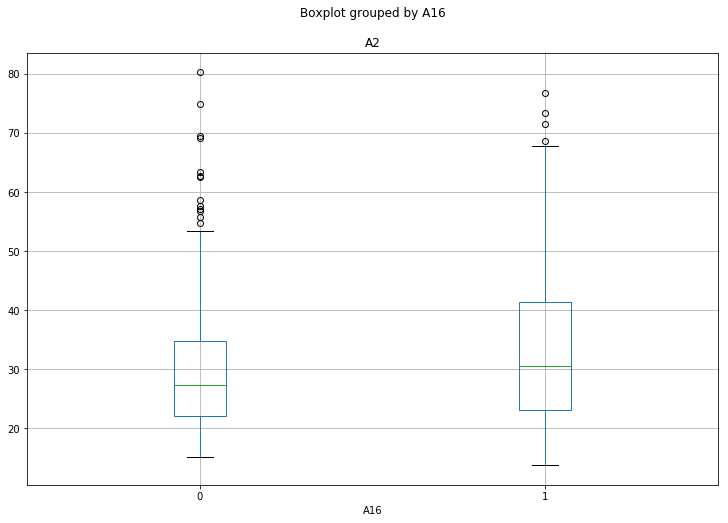

In [74]:
boxplot = df.boxplot('A2', by='A16', figsize =(12,8))
boxplot

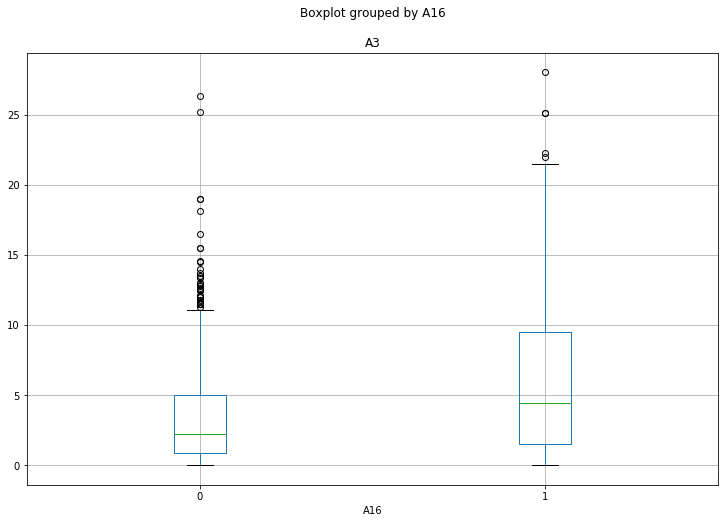

In [69]:
boxplot = df.boxplot('A3', by='A16', figsize =(12,8))
boxplot

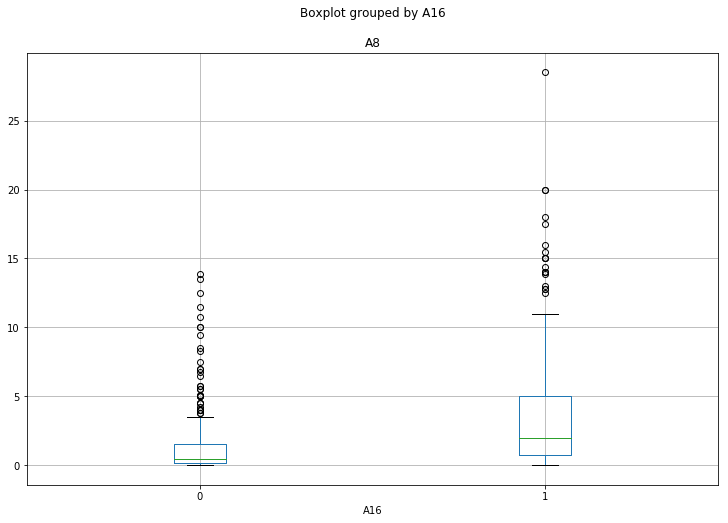

In [70]:
boxplot = df.boxplot('A8', by='A16', figsize =(12,8))
boxplot

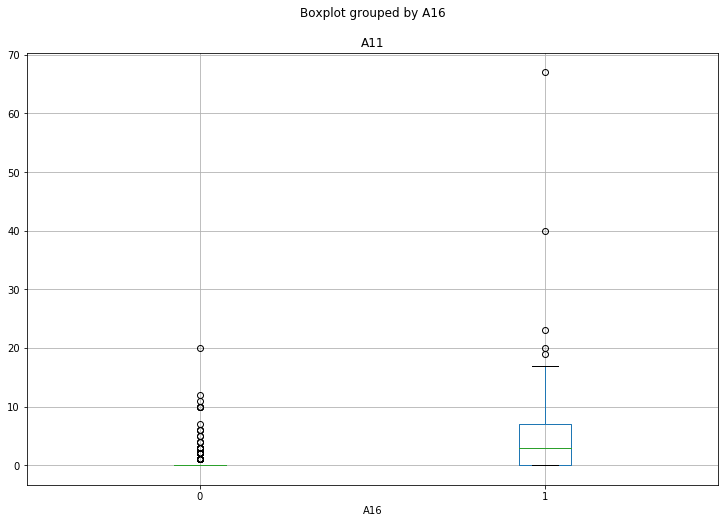

In [71]:
boxplot = df.boxplot('A11', by='A16', figsize =(12,8))
boxplot

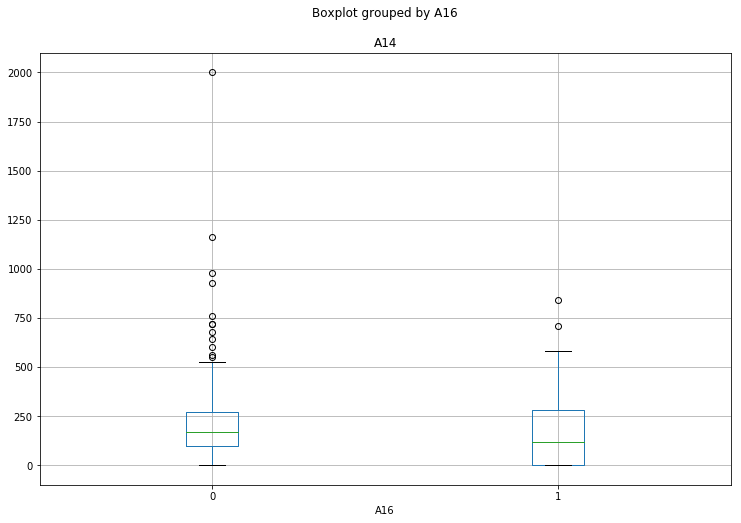

In [72]:
boxplot = df.boxplot('A14', by='A16', figsize =(12,8))
boxplot

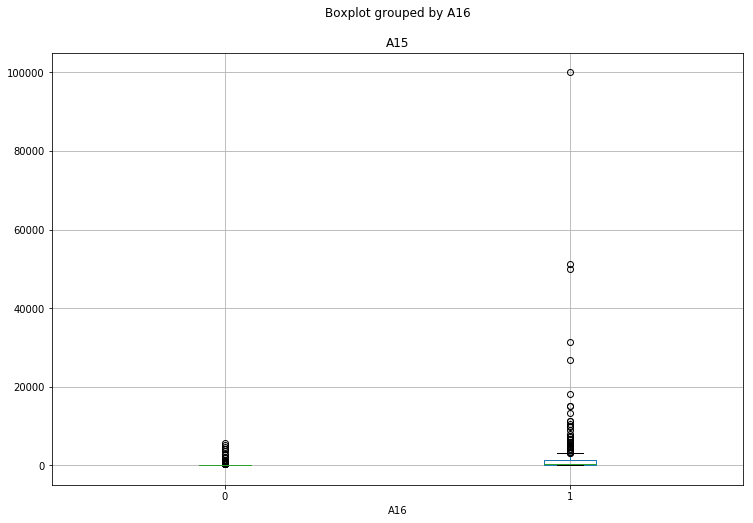

In [73]:
boxplot = df.boxplot('A15', by='A16', figsize =(12,8))
boxplot

In [31]:
# Check means on continuous features split by class label
pivot = df.pivot_table(df, index = 'A16')

,A11,A14,A15,A2,A3,A8
A16,,,,,,
0,0.631854,199.699468,198.605744,29.808231,3.839948,1.257924
1,4.605863,164.421927,2038.859935,33.720492,5.904951,3.427899


In [34]:
# A15 looks extremely different between the class labels
ttest_ind(df[df['A16']==0]['A15'], df[df['A16']==1]['A15'])

Ttest_indResult(statistic=-4.680216020964486, pvalue=3.4520256956287944e-06)

In [35]:
# And the t-test confirms we can reject: 
# H0: the difference between the means for A15 split by class label is 0. 

statistic, pvalue = ttest_ind(df[df['A16']==0]['A15'], df[df['A16']==1]['A15'])
pvalue < .01

True

In [39]:
# A2 seems notably less different between the class labels
ttest_ind(df[df['A16']==0]['A2'], df[df['A16']==1]['A2'], nan_policy='omit')

Ttest_indResult(statistic=-4.2922156166315535, pvalue=2.0276637071781407e-05)

In [40]:
# Nontheless, the t-test shows we can reject:
# H0: the difference between the means for A2 split by class label is 0. 

statistic, pvalue = ttest_ind(df[df['A16']==0]['A15'], df[df['A16']==1]['A15'])
pvalue < .01

True

In [44]:
# For the categorical features, explore by creating "cross tabs" (aka 
# contingency tables) between them and the class label

contingencyA1 = pd.crosstab(df['A16'], df['A1'])
contingencyA1

A1,a,b
A16,,
0,112,262
1,98,206


In [55]:
# chi2_contingency returns:
#   chi2: float
#   p: float
#   dof: int
#   expected: ndarray, same shape as observed 
    
chi2_contingency(contingencyA1)

(0.3112832649161994,
 0.5768937883001118,
 1,
 array([[115.84070796, 258.15929204],
        [ 94.15929204, 209.84070796]]))

In [57]:

chi2, p, dof, expected = chi2_contingency(contingencyA1)
p < .05

False

In [45]:
contingencyA4 = pd.crosstab(df['A16'], df['A4'])
contingencyA4

A4,l,u,y
A16,,,
0,0,263,118
1,2,256,45


In [46]:
contingencyA5 = pd.crosstab(df['A16'], df['A5'])
contingencyA5

A5,g,gg,p
A16,,,
0,263,0,118
1,256,2,45


In [47]:
contingencyA6 = pd.crosstab(df['A16'], df['A6'])
contingencyA6

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32


In [49]:
contingencyA7 = pd.crosstab(df['A16'], df['A7'])
contingencyA7

A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
0,34,4,49,51,5,2,1,230,2
1,25,2,8,87,3,2,1,169,6


In [50]:
contingencyA9 = pd.crosstab(df['A16'], df['A9'])
contingencyA9

A9,f,t
A16,,
0,306,77
1,23,284


In [51]:
contingencyA10 = pd.crosstab(df['A16'], df['A10'])
contingencyA10

A10,f,t
A16,,
0,297,86
1,98,209


In [52]:
contingencyA12 = pd.crosstab(df['A16'], df['A12'])
contingencyA12

A12,f,t
A16,,
0,213,170
1,161,146


In [53]:
contingencyA13 = pd.crosstab(df['A16'], df['A13'])
contingencyA13

A13,g,p,s
A16,,,
0,338,3,42
1,287,5,15


In [61]:
contingencyA13.columns.name

'A13'

In [0]:
clist = [contingencyA1, contingencyA4, contingencyA5, contingencyA6, 
         contingencyA7, contingencyA9, contingencyA10, contingencyA12, 
         contingencyA13,]

In [64]:
# Take list of contingency tables for each categorical feature and print 
# returned values from chi2_contingency

for cont in clist:
  chi2, p, dof, expected = chi2_contingency(cont)
  print(f"Feature: {cont.columns.name}")
  print(f"Chi-Squared: {chi2}")
  print(f"P-value: {p}")
  print(f"Degrees of Freedom: {dof}") 
  print("Expected: \n", np.array(expected))
  print("H0 rejected (95% confidence): " + str(p<.05))
  print('---'*10)

Feature: A1
Chi-Squared: 0.3112832649161994
P-value: 0.5768937883001118
Degrees of Freedom: 1
Expected: 
 [[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]
H0 rejected (95% confidence): False
------------------------------
Feature: A4
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  1.11403509 289.09210526  90.79385965]
 [  0.88596491 229.90789474  72.20614035]]
H0 rejected (95% confidence): True
------------------------------
Feature: A5
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[289.09210526   1.11403509  90.79385965]
 [229.90789474   0.88596491  72.20614035]]
H0 rejected (95% confidence): True
------------------------------
Feature: A6
Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.

In [0]:
# Only in A1 and A12 were we unable to reject the null hypothesis.
# The most extreme difference between the observed and expected values was in 
# A9.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*